In [22]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Membaca data.csv dan menampilannya
data = pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [37]:
# Melakukan data cleaning kolom dan data yang duplikat
data = data.drop(["Make","Model","Engine Fuel Type","Driven_Wheels","Transmission Type","Market Category","Vehicle Style","Vehicle Size"], axis = 1)
data = data.drop_duplicates()
data.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [38]:
#Menampilkan data yang berisi null value
print(data.isnull().sum())

Year                 0
Engine HP           69
Engine Cylinders    30
Number of Doors      6
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


In [39]:
# Melakukan data cleaning untuk missing value
data = data.dropna()    #Drop the missing values.
data.count()

Year                10879
Engine HP           10879
Engine Cylinders    10879
Number of Doors     10879
highway MPG         10879
city mpg            10879
Popularity          10879
MSRP                10879
dtype: int64

In [40]:
# Melakukan normalize data
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,0.043391,0.007228,0.000129,0.000043,0.000561,0.000410,0.084495,0.995452
1,0.049182,0.007337,0.000147,0.000049,0.000685,0.000465,0.095772,0.994160
2,0.054920,0.008193,0.000164,0.000055,0.000765,0.000546,0.106945,0.992713
3,0.067533,0.007724,0.000201,0.000067,0.000940,0.000604,0.131506,0.988982
4,0.057820,0.006613,0.000173,0.000058,0.000805,0.000518,0.112592,0.991935


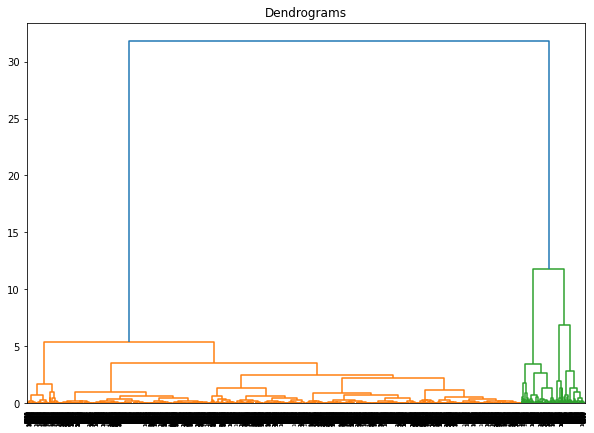

In [28]:
# Membuat dendrogram Hierarchical dengan method ward
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

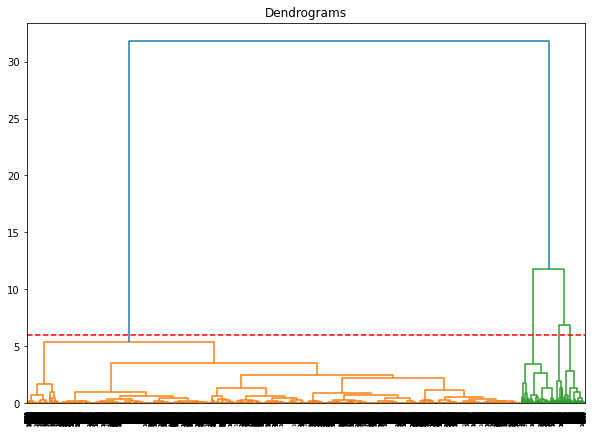

In [29]:
# Membuat dendrogram Hierarchical dengan method ward
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [30]:
# Membuat analisis Hierarchical dengan AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, ..., 1, 1, 1])

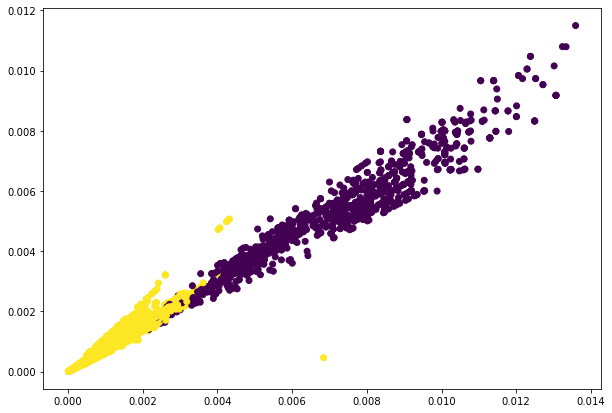

In [31]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['highway MPG'], data_scaled['city mpg'], c=cluster.labels_) 

In [41]:
# Library untuk KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [42]:
# Menggunakan kombinasi fitur Highway MPG dengan City MPG
data = data.iloc[:, 4:6]
data.head()

,highway MPG,city mpg
0,26,19
1,28,19
2,28,20
3,28,18
4,28,18


In [43]:
#Renaming kolom untuk menghilangkan spasi

data = data.rename(columns={"highway MPG": "MPGH", "city mpg": "MPGC"})
data.head(5)

,MPGH,MPGC
0,26,19
1,28,19
2,28,20
3,28,18
4,28,18


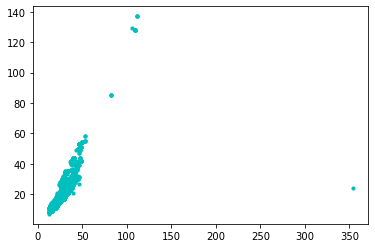

In [44]:
# Menampilkan scatter plot
plt.scatter(data.MPGH, data.MPGC, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [45]:
# Inisialisasi array
data =  np.array(data)
print(data)

[[26 19]
 [28 19]
 [28 20]
 ...
 [23 16]
 [23 16]
 [26 17]]


In [46]:
# Inisialisasi fungsi MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data)
x_scaled

array([[0.04093567, 0.09230769],
       [0.04678363, 0.09230769],
       [0.04678363, 0.1       ],
       ...,
       [0.03216374, 0.06923077],
       [0.03216374, 0.06923077],
       [0.04093567, 0.07692308]])

In [48]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=123)

In [54]:
print(kmeans.cluster_centers_)

[[0.03231558 0.07266739]
 [0.0637815  0.14464387]
 [0.26608187 0.87100592]]


In [67]:
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


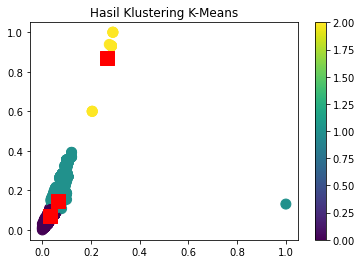

In [68]:
#Output untuk scatter plot
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = kmeans.labels_, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()